# Data Science Fundamentals — Linear Regression
This notebook accompanies the medium article [Data Science Fundamentals — Linear Regression](https://medium.com/k-folds/data-science-fundamentals-linear-regression-9b3bfb0c52bf). 

Refer to [this guide](https://medium.com/k-folds/saving-without-gitting-downloading-from-github-without-using-git-72b90c694af4) for help downloading the notebook!


## Exploring the Problem

In [1]:
#for graphing in the notebook
%matplotlib inline

#standard imports
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

To find a line of best fit, we need some points to fit! Let’s examine the following collection of points. We will store them as Numpy arrays, which are similar to regular Python lists, but have more powerful indexing and computational features which will come in handy below.

In [2]:
#data we want to fit
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y = np.array([1.0, 1.7, 3.3, 3.9, 4.8, 7.0])

It's always good practice to try to visualize and explore the data initially. Let's graph the data points and see what they look like.

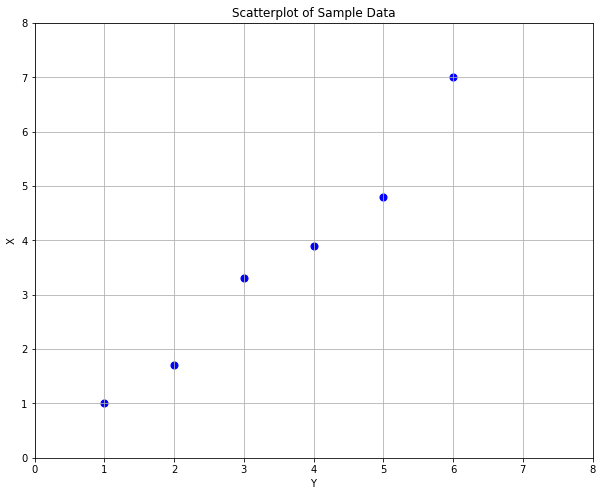

In [3]:
# Create a visualization of the data

#initialize a figure
plt.figure(figsize=(10,8))

#drawing the data points
plt.scatter(x, y, color='b', s = 50, label = 'Sample Data')

# Chart title
plt.title('Scatterplot of Sample Data')
# y label
plt.ylabel('X')
# x label
plt.xlabel('Y')

#Turning on gridlines
plt.grid(True)

# set the figure boundaries
plt.xlim([0, 8])
plt.ylim([0, 8])

plt.show()

These points look like they're on a line, there's just a little variation. What if we wanted to draw a line using these points? These are some ways we could do that:

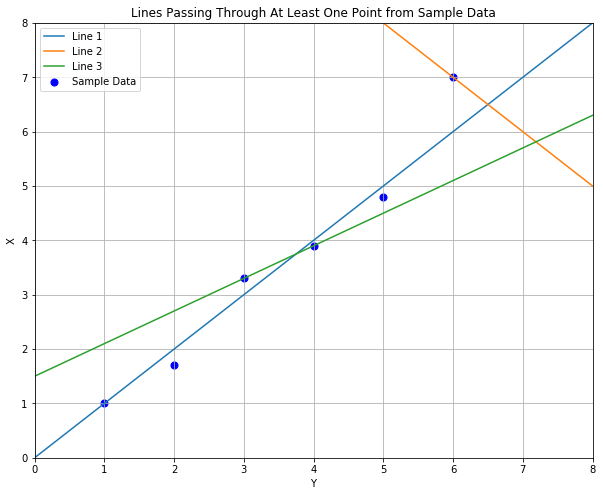

In [4]:
# Create a figure
plt.figure(figsize=(10,8))

plt.scatter(x, y, color='b', s = 50, label = 'Sample Data')

# Chart title
plt.title('Lines Passing Through At Least One Point from Sample Data')

t = [0,1,2,3,4,5,6,7,8]
s = [0,1,2,3,4,5,6,7,8]
s2 = [13,12,11,10,9,8,7,6,5]
s3 = [1.5,2.1,2.7,3.3,3.9,4.5,5.1,5.7,6.3]
plt.plot(t, s, label='Line 1')
plt.plot(t, s2, label='Line 2')
plt.plot(t, s3, label='Line 3')
 
# y label
plt.ylabel('X')

# x label
plt.xlabel('Y')

#Turning on gridlines
plt.grid(True)

#displaying a legend
plt.legend(loc='upper left')

# set the figure boundaries
plt.xlim([0, 8])
plt.ylim([0, 8])

plt.show()

All of these lines utilize at least one of the points, but none use them all. How can we determine which is best? 

We can define the error of the line to the points as the sum of all the vertical distances. Draw a line from the point to the graph, measure the distance, then add them all up! 

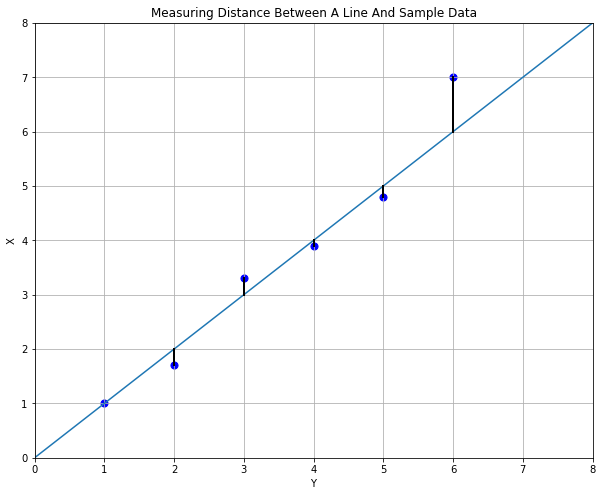

In [5]:
# Create a figure
plt.figure(figsize=(10,8))

plt.scatter(x, y, color='b', s = 50, label = 'Sample Data')

# Chart title
plt.title('Measuring Distance Between A Line And Sample Data')

t = [0,1,2,3,4,5,6,7,8]
s = [0,1,2,3,4,5,6,7,8]
plt.plot(t, s, label='Line 1')
 
# y label
plt.ylabel('X')

# x label
plt.xlabel('Y')

#Turning on gridlines
plt.grid(True)

#drawing the vertical distances
plt.plot([1, 1], [y[0], 1], color='k', linestyle='-', linewidth=2)
plt.plot([2, 2], [y[1], 2], color='k', linestyle='-', linewidth=2)
plt.plot([3, 3], [y[2], 3], color='k', linestyle='-', linewidth=2)
plt.plot([4, 4], [y[3], 4], color='k', linestyle='-', linewidth=2)
plt.plot([5, 5], [y[4], 5], color='k', linestyle='-', linewidth=2)
plt.plot([6, 6], [y[5], 6], color='k', linestyle='-', linewidth=2)

# set the figure boundaries
plt.xlim([0, 8])
plt.ylim([0, 8])

plt.show()

But wait, there's a catch! if we measure the distance as the y value of the line minus the y value of the point, what would the error of these lines be?

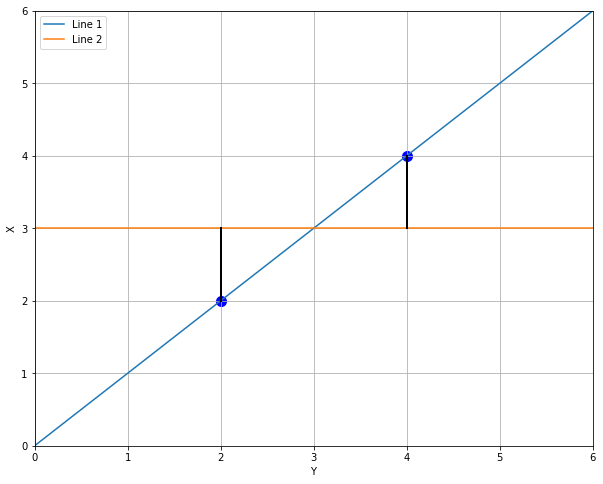

In [6]:
# Create a figure
plt.figure(figsize=(10,8))

plt.scatter([2, 4], [2, 4], color='b', s = 100)

# Chart title
plt.title('')

t = [0,1,2,3,4,5,6,7]
s = [0,1,2,3,4,5,6,7]
s2 = [3,3,3,3,3,3,3,3]
plt.plot(t, s, label='Line 1')
plt.plot(t, s2, label='Line 2')
 
# y label
plt.ylabel('X')

# x label
plt.xlabel('Y')

#Turning on gridlines
plt.grid(True)

#displaying a legend
plt.legend(loc='upper left')


#drawing the vertical distances
plt.plot([2, 2], [2, 3], color='k', linestyle='-', linewidth=2)
plt.plot([4, 4], [3, 4], color='k', linestyle='-', linewidth=2)

# set the figure boundaries
plt.xlim([0, 6])
plt.ylim([0, 6])

plt.show()

They would both be 0! Thats clearly not right, since one fits the points exactly and the other does not. To avoid this, we are going to square that distance. This has the magical property that it makes all numbers positive, and it penalizes the really far off points more than the closer ones by making the larger distances really large.

With that, we will define our error function as the sum of the total squared error from the set of points to the line. Now, given any set of lines, we can define the best line as the one with the smallest error!

## Prepping Data
To calculate our error, we need to convert the data into matrices.

In [7]:
#creating design matrix to have a column of 1s followed by a column of the x values
ones = np.ones((len(x),1))

#converting x into a column vector
x = np.reshape(x, (len(x),1))
    
#appending columns together and casting to a matrix
X = np.asmatrix(np.append(ones, x, axis = 1))

print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]]


In [9]:
#converting y into a column
y = np.reshape(y, (len(x),1))
print(y)

[[ 1. ]
 [ 1.7]
 [ 3.3]
 [ 3.9]
 [ 4.8]
 [ 7. ]]


Now let’s calculate the error from a given line. To specify a line, we just need an intercept and a slope. Let's start by calculating the distance per point matrix:

In [10]:
#initial guess for beta
b = [[1.],
     [0.]]

#calculating element wise differences
error = X.dot(b) - y
print(error)

[[ 0. ]
 [-0.7]
 [-2.3]
 [-2.9]
 [-3.8]
 [-6. ]]


To get the total error, square each element and sum the values:

In [11]:
#squaring the elements and summing, diving by the number of records
squared_error = np.square(X.dot(b) - y)
total_error = np.sum(squared_error)

print(total_error)

64.63


Excellent! To wrap it up, let’s save this in a function, since we’ll be using this a lot. The function squared_error() takes as input an X design matrix, a y column vector, and a column vector beta representing a line:

In [12]:
def squared_error(X, y, beta):
    squared_error = np.square(X.dot(beta) - y)
    return np.sum(squared_error)
  
print(squared_error(X, y, b))

64.63


## Finding the Line of Best Fit - The Traditional Way

To calculate the line of best fit, we just need to multiply a couple of matrices together. Mathematically, we can show that beta is exactly equal to (X'X)^(-1) * X'Y, so that's what we will do!

First let's calculate X'X:

In [13]:
XtX =X.T.dot(X)
print(XtX)

[[  6.  21.]
 [ 21.  91.]]


Then we need X’Y:

In [14]:
Xty = X.T.dot(y)
print(Xty)

[[ 21.7]
 [ 95.9]]


Last step, invert X’X and multiply the two together:

In [15]:
from numpy.linalg import inv
beta = inv(XtX).dot(Xty)
print(beta)

[[-0.37333333]
 [ 1.14      ]]


How do we interpret this? The first number is beta_0, and the second is beta_1, which tells us that the best line, given the data we’ve observed, is y = -0.37 + 1.14*x. Pretty close to y=x!

## Finding the Line of Best Fit - Gradient Descent

The analytical approach is great, it’s guaranteed to be the exact answer to our problem. However, what if you have a HUGE dataset? Inverting matrices becomes harder as the matrix grows in size. Since we’re looking for an approximate line to fit our data points, what if we could afford to lose a little accuracy to ease the computation a bit? We can approximate the answer by using gradient descent.

First off, we need an initial guess for beta to get the algorithm started. We use that beta to get an initial value from our error function:

In [16]:
beta = [[1.],
        [1.]]

print(squared_error(X, y, beta))

5.83


Now that we have a value, we iterate! To figure out which direction to move on our error function, we need the derivative. Then, we need to calculate the gradient with that beta.

In [17]:
gradient = (2*X.T.dot(X).dot(beta) - 2*X.T.dot(y))
print(gradient)

[[ 10.6]
 [ 32.2]]


Finally, we need to multiply it by a small amount and subtract it from the initial guess:

In [18]:
beta = beta - 0.01*gradient
print(beta)

[[ 0.894]
 [ 0.678]]


That consists of one iteration. To find the optimal answer, we need to keep iterating for a little bit and let the values slowly inch towards the correct answer.

In [19]:
for iteration in range(1000):
    gradient = (2*X.T.dot(X).dot(beta) - 2*X.T.dot(y)) /(len(y))
    beta = beta - 0.01*gradient
    cost = squared_error(X, y, beta)

print(beta)

[[-0.33964499]
 [ 1.1321311 ]]


Again, pretty close to the line y=x!

## Checking against SciKit Learn

Our basic implementation of the algorithm already does pretty good, but there is a lot of ways we can improve it as our data size grows. In practice, sklearn is a commonly used Python library to run linear regression as well as many other popular machine learning algorithms all from one api. In fact, it’s so effective, you can run a model in just a few lines of code:

In [21]:
from sklearn import linear_model
#rewriting the variables since sklearn does not need a column of 1s in X to run
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y = np.array([1.0, 1.7, 3.3, 3.9, 4.8, 7.0])

#reshaping to a column vector
x = np.reshape(x, (len(x),1))
y = np.reshape(y, (len(y),1))

#initializing a regression object
regr = linear_model.LinearRegression()

#fitting the object to data
regr.fit(x, y)

#print results
print(regr.intercept_ )
print(regr.coef_)

[-0.37333333]
[[ 1.14]]


Exactly what we found before! In a future post, we’ll go over Sklearn more in depth, but for now, happy coding!